In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Prepare Data For Siamese Network

Load Data and Labels

In [ ]:
train_data_dir = r'C:\Users\jands\Market-1501-v15.09.15\bounding_box_train'

# the image size for all the images in The Market Dataset is 128x64
BATCH_SIZE = 32
IMAGE_SIZE = (128, 64)

dataset = []

In [ ]:
file_paths = tf.data.Dataset.list_files(train_data_dir + '/*.jpg')

# Define the function to extract the label from the file name
# works for my specific directory path...
def extract_label(file_path):
    label = tf.strings.split(file_path, '_')
    label = tf.strings.split(label, '\\')
    return int(label[2][1])

def read_and_decode(file_path):
    label = extract_label(file_path)
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

dataset = [read_and_decode(file) for file in file_paths]

Visualize Data

IMAGE SHAPE:  (128, 64, 3)


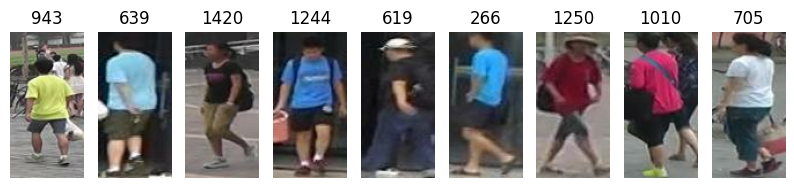

In [ ]:
plt.figure(figsize=(10, 10))
subplot_pos = 1

for image, label in dataset[:9]:
  ax = plt.subplot(1, 9, subplot_pos)
  subplot_pos += 1
  plt.imshow(image)
  plt.title(label)
  plt.axis("off")

print("IMAGE SHAPE: ", image.shape)

In [ ]:
labels = [label for image, label in dataset]
unique_labels = np.unique(np.array(labels))

idxs = [np.where(labels == unique_label)[0] for unique_label in unique_labels]

for unique_label in unique_labels:
    idxs = np.where(labels == unique_label)[0]
    print(f"{unique_label}: {len(idxs)} {idxs}")

Make Pairs

In [ ]:
def make_pairs(dataset):
    pairs_list = []

    labels = [label for image, label in dataset]
    unique_labels = np.unique(np.array(labels))

    idxs = [np.where(labels == unique_label)[0] for unique_label in unique_labels]
    for idx_1 in range(len(labels)):
        label = labels[idx_1]

        # randomly pick an image that belongs to the *same* class
        idx_2 = np.random.choice(np.where(np.array(labels) == label)[0])

        pairs_list.append(((idx_1, idx_2), 1))

        # randomly pick an image that does *not* belong to the same class
        idx_2 = np.random.choice(np.where(np.array(labels) != label)[0])

        pairs_list.append(((idx_1, idx_2), 0))

    return pairs_list

pairs_list = make_pairs(dataset)

25872


In [ ]:
images = [image for image, label in dataset]

fig, axes = plt.subplots(2, 9)
plt.subplots_adjust(wspace=0.5, hspace=0)
j = 0

for (idx1, idx2), label in pairs_list[:900:100]:
  axes[0, j].imshow(images[idx1], aspect='equal')
  axes[1, j].imshow(images[idx2], aspect='equal')
  axes[0, j].set_title(label)
  axes[0, j].set_axis_off()
  axes[1, j].set_axis_off()
  j += 1

NameError: name 'dataset' is not defined

## Creating and Creating Siamese Network